<a href="https://colab.research.google.com/github/luisaheise/eLMo/blob/main/eLMo_aplicacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install allennlp

In [2]:
import h5py
import pandas as pd
import seaborn as sns
from allennlp.modules.elmo import Elmo, batch_to_ids
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
import nltk
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway_5.5B/elmo_2x4096_512_2048cnn_2xhighway_5.5B_options.json"
weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway_5.5B/elmo_2x4096_512_2048cnn_2xhighway_5.5B_weights.hdf5"

elmo = Elmo(options_file, weight_file, 1, dropout=0)

downloading: 100%|##########| 374434792/374434792 [00:12<00:00, 30185315.67B/s]
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:434: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


In [17]:
frases = ['I love the fourth Harry Potter book', 'Have you this book recently?', 'We are reading a different book this week.', 'In the last two years the book has only sold 200 copies', 'You will have to book an appointment', 'I would like to book a room, please!']
frases_tokenizadas = [word_tokenize(frase.lower()) for frase in frases]
character_ids = batch_to_ids(frases_tokenizadas)
embeddings = elmo(character_ids)
embs = np.array([emb.detach().numpy() for emb in embeddings['elmo_representations']])
idx_f = sum([[i for i,word in enumerate(frase) if word.lower() == 'book'] for frase in frases_tokenizadas],[])
embs_mean = np.mean(embs, axis=0)
embs_f = np.array([emb[idx_f[i]] for i,emb in enumerate(embs_mean)])

In [6]:
def cossine_similarity(x,y):
  sim = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
  return sim

In [18]:
d = len(frases)
matrix_sim = np.zeros((d,d))
for i,vec1 in enumerate(embs_f):
  for j,vec2 in enumerate(embs_f):
    sim = cossine_similarity(vec1,vec2)
    matrix_sim[i,j] = sim

similaridades = pd.DataFrame(matrix_sim, index=frases, columns=frases)

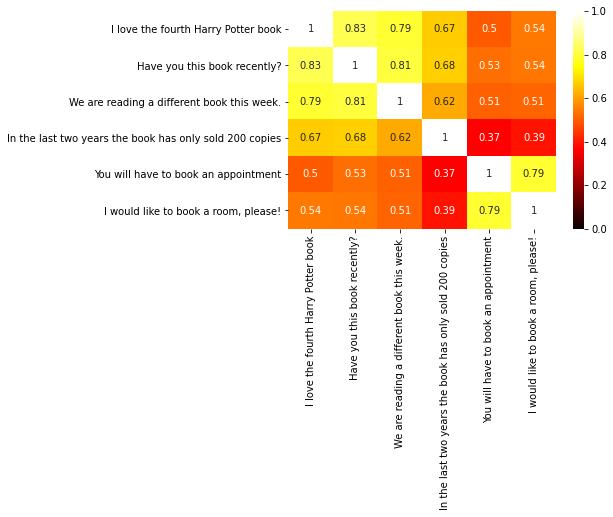

In [19]:
sns.heatmap(similaridades, annot=True, vmin=0, vmax=1, cmap='hot')

In [13]:
def plot_with_tSNE(w_vectors, labels):
  WV_embedded = TSNE(n_components=2).fit_transform(w_vectors)
  for wv, label in zip(WV_embedded,labels):
    plt.scatter(wv[0],wv[1], label=label)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

In [14]:
def plot_with_PCA(w_vectors, labels):
  WV_embedded = PCA(n_components=2).fit_transform(w_vectors)
  for wv, label in zip(WV_embedded,labels):
    plt.scatter(wv[0],wv[1], label=label)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

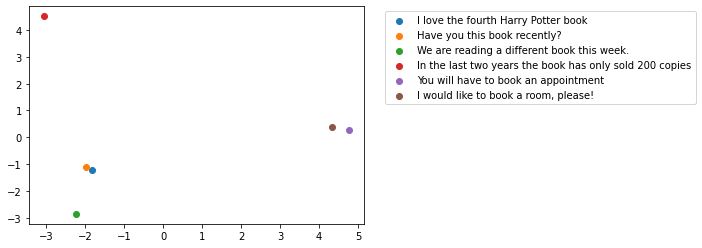

In [15]:
plot_with_PCA(embs_banco, frases)

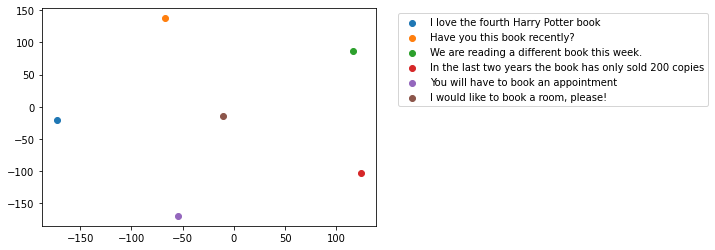

In [16]:
plot_with_tSNE(embs_banco, frases)